In [ ]:
%pip install ultralytics==8.0.196

In [8]:
from IPython import display
display.clear_output(wait=True)

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.10.8 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Setup complete  (8 CPUs, 15.9 GB RAM, 421.7/456.2 GB disk)


In [2]:
from ultralytics import YOLO
from IPython.display import display, Image


In [ ]:
%pip install roboflow

In [47]:
from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("comic-speech-bubbles").project("comicbubbles")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ComicBubbles-1 in yolov5pytorch:: 100%|██████████| 192/192 [00:00<00:00, 1425.01it/s]


In [21]:
import torch
print(torch.cuda.memory_summary(device=None, abbreviated=False))


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 168235 KiB | 252377 KiB |   5878 MiB |   5714 MiB |
|       from large pool | 122880 KiB | 207040 KiB |   5244 MiB |   5124 MiB |
|       from small pool |  45355 KiB |  49573 KiB |    633 MiB |    589 MiB |
|---------------------------------------------------------------------------|
| Active memory         | 168235 KiB | 252377 KiB |   5878 MiB |   5714 MiB |
|       from large pool | 122880 KiB | 207040 KiB |   5244 MiB |

In [7]:
%pip uninstall torch torchvision torchaudio


^C
Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
torch.cuda.empty_cache()

In [55]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

results = model.train(data='C:/Users/neera/OneDrive/Desktop/fanon/ComicBubbles-1/data.yaml',batch = 8, epochs=25, imgsz=960,device = '0', amp=False)

Ultralytics YOLOv8.0.196  Python-3.10.8 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/neera/OneDrive/Desktop/fanon/ComicBubbles-1/data.yaml, epochs=25, patience=50, batch=8, imgsz=960, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes

In [1]:
from ultralytics import YOLO

model = YOLO('./runs/detect/train/weights/best.pt')
# model = YOLO('yolov8s.pt')


c:\Users\neera\OneDrive\Desktop\fanon\fan\lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='

In [ ]:
import os
def looper(rootDir):
    fileNameList = []
    filePathList = []
    for subDir, dirs, files in os.walk(rootDir):
        for file in files:
            fileInfo = file.split('.')
            fileName, fileExten = fileInfo[0], fileInfo[-1].lower()  # Convert extension to lowercase
            filePath = os.path.join(subDir, file)
            if fileExten in ['jpg', 'png']:  # Corrected file extensions check
                if fileName not in fileNameList:
                    fileNameList.append(fileName)
                    filePathList.append(filePath)
    return filePathList


model.predict(looper('./images'), save=True, imgsz=640, conf=0.51,task='detect')

In [28]:

results=model.predict("./images/3.png", save=False, imgsz=960, conf=0.5,task='detect')

# View resu


image 1/1 c:\Users\neera\OneDrive\Desktop\fanon\images\3.png: 768x960 4 general-speech-bubbles, 38.6ms
Speed: 104.0ms preprocess, 38.6ms inference, 2.0ms postprocess per image at shape (1, 3, 768, 960)


In [15]:
from ultralytics import YOLO

model = YOLO('./models/yolo_recognition_model.pt')

results=model.predict("./sample/10.png", save=False, imgsz=960, conf=0.5,task='detect')

# View resu


image 1/1 c:\Users\neera\OneDrive\Desktop\final\sample\10.png: 768x960 5 general-speech-bubbles, 1 information-bubble, 32.2ms
Speed: 6.0ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 768, 960)


4
Label: general-speech-bubble, Box: [10.985549926757812, 108.65885925292969, 220.3025665283203, 308.0606994628906], Confidence: 0.9766172766685486


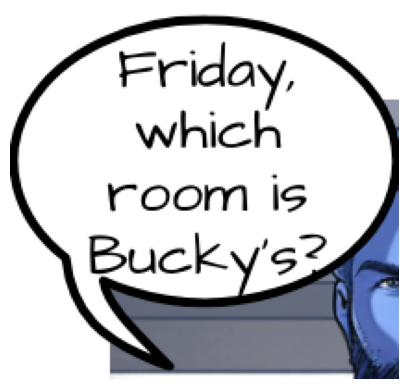

Label: general-speech-bubble, Box: [1307.11572265625, 335.43450927734375, 1419.09033203125, 451.27362060546875], Confidence: 0.9517947435379028


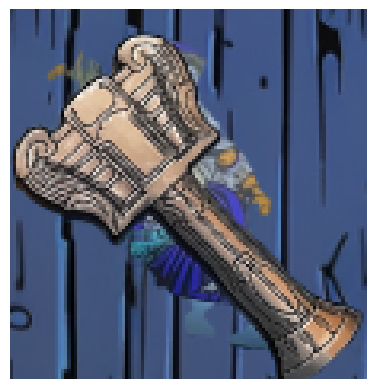

Label: general-speech-bubble, Box: [911.0569458007812, 993.3767700195312, 1169.15087890625, 1137.9013671875], Confidence: 0.9449703693389893


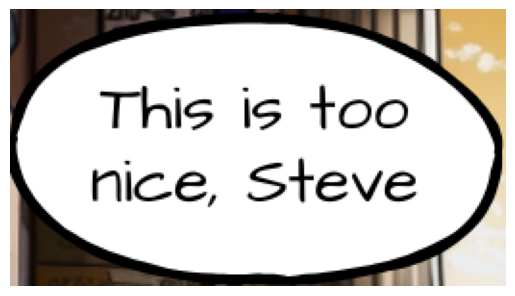

Label: general-speech-bubble, Box: [1566.16748046875, 344.6640930175781, 1668.444580078125, 444.9840393066406], Confidence: 0.9290140867233276


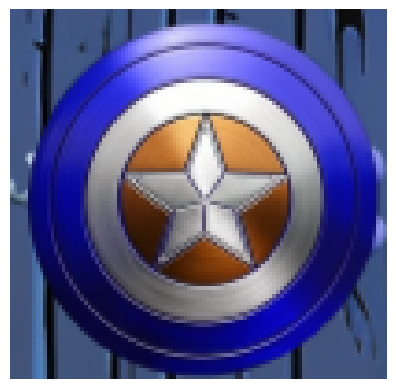

In [14]:
import cv2
from matplotlib import pyplot as plt
for result in results:
    boxes = result.boxes.xyxy  # Bounding box coordinates
    confs = result.boxes.conf  # Confidence scores
    classes = result.boxes.cls  # Class IDs
    image = cv2.imread("./sample/10.png")
    print(len(boxes))
    for box, conf, cls in zip(boxes, confs, classes):
        label = result.names[int(cls)]  # Get the label of the class
        print(f"Label: {label}, Box: {box.tolist()}, Confidence: {conf.item()}")
        img=image[int(box[1]):int(box[3]),int(box[0]):int(box[2])]
        plt.imshow(img)
        plt.axis('off')  # Hide the axis
        plt.show()

In [20]:
import json

def load_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

def dict_to_tuple(d):
    return tuple(sorted(d.items()))

def tuple_to_dict(t):
    return dict(t)

def find_intersection_and_difference(json_file1, json_file2):
    # Load JSON data
    data1 = load_json(json_file1)
    data2 = load_json(json_file2)
    
    # Convert lists of dicts to sets of tuples
    set1 = set(map(dict_to_tuple, data1))
    set2 = set(map(dict_to_tuple, data2))
    
    # Find intersection
    intersection = set1 & set2
    
    # Find differences
    difference1 = set1 - set2
    difference2 = set2 - set1
    
    # Convert tuples back to lists of dicts
    intersected_dicts = list(map(tuple_to_dict, intersection))
    difference1_dicts = list(map(tuple_to_dict, difference1))
    difference2_dicts = list(map(tuple_to_dict, difference2))
    
    return intersected_dicts, difference1_dicts, difference2_dicts

# Example usage
json_file1 = 'output_opencv.json'
json_file2 = 'output_yolo.json'
intersection, difference1, difference2 = find_intersection_and_difference(json_file1, json_file2)

print("Intersection:")
print(json.dumps(intersection, indent=4))

print("Difference in opencv not in yolo:")
print(json.dumps(difference1, indent=4))

print("Difference in yolo not inopencv:")
print(json.dumps(difference2, indent=4))


Intersection:
[
    {
        "tagType": "CHARACTER",
        "tagValue": "Rogers"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Buck"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Ned"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Harrington"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Tones"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Ma"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Parker"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Ultron"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Bucky"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Teven"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Steve"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Tony"
    },
    {
        "tagType": "CHARACTER",
        "tagValue": "Anyrhing"
    },
    {
        "tagType": "CHARA